Acknowledgements
This public dataset is part of Airbnb, and the original source can be found on this website.

Inspiration
What can we learn about different hosts and areas?
What can we learn from predictions? (ex: locations, prices, reviews, etc)
Which hosts are the busiest and why?
Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading the data set
data =pd.read_csv('AB_NYC_2019.csv')

In [5]:
#Checking the first 5 records
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<font color='green'>

Types of Data:
 
  
    Basically we have 2 types of data 
     
   1)Categorical:It contains discrete groups or characteristics such as Gender,Ratings.
  
    Categorical variables can be further categorized as either nominal, ordinal or dichotomous.
    Nominal:variables are variables that have two or more categories example:Colors
    Dchotomous:nominal variable with only 2 categories example Gender
    Ordinal: Can be ranked
   
 
 
   2)Numeric: Data that has a numeric meaning and we can do measurements.Example Height,weight,speed ...
    
    Numeric data can be discrete or contimeous
    Discrete:It will take integer value and we can count example number of incoming call
    Contineous:It will take infinite number of values with in a range example Temmperature,velocity...
    


</font>

## <font color='green'> checking Column name and datatype</font>

In [6]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

<h>Here we can say all int ,float types are numeric data and objects are categorical data(text data is not always categorical)</h>

# checking null value

In [8]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Measure of central tendency

 Mean : It is the average value of the data
 
 We can use mean() method to find mean from dataset
 
 Median : It is the middle value of the data 
 
 Median() is used to find median 
 
 Mode: It is the most common value in the data.
 
 Mode() is used to find mode
 

# outliers

Outliers are data values that differ greatly from the majority of a set of data.

Quartiles :When we divide data into 4 equal parts first n/4 th value is called Q1 :first quartile(25th percentile),
           second quartile i n/2th value(50th percentle) and  Q3 third quartile is 3/2nth value (75th percentile)
           
Interquartile range(IQR ) =Q3-Q1

Normally we say we subtract 1.5 x IQR from the first quartile, any data values that are less than this number are considered outliers. Similarly, if we add 1.5 x IQR to the third quartile, any data values that are greater than this number are considered outliers.

We can visualize outliers using box plot


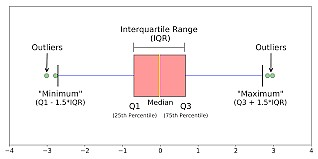




# Dealing with Null values

basic method to deal with null values are:

1> We can drop null values

2>We can impute with mean,medianand mode value
  >mean and median are used in numeric data and mode is used in categorical data
  >mean is preferred when there is no outlier in data
  >median is preferred when there is outlier in data

-We can use fillna method to fill the null values
-WE can drop method to dropna null values

In [9]:
data_copy=data.copy()#copying data

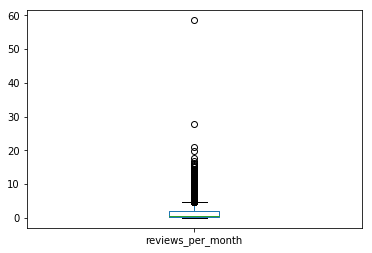

In [10]:
data_copy.reviews_per_month.plot(kind ='box')

#we can see so many outliers are there.

In [11]:
#can impute reviews_per_month with median value
data_copy.fillna(data_copy.median(),inplace=True)
# droping unwanted null values
data_copy.dropna(inplace=True,axis=0)

In [12]:
data_copy.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


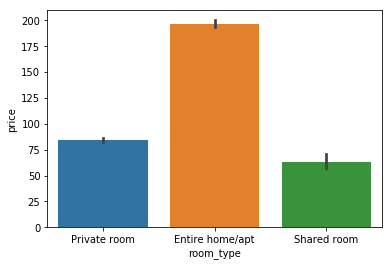

In [13]:
sns.barplot(data_copy.room_type,data_copy.price)

In [14]:
# sns.pairplot(data =data_copy,diag_kind='kde')

In [15]:
data_copy.neighbourhood_group.value_counts()

Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: neighbourhood_group, dtype: int64

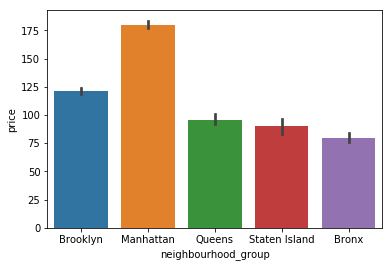

In [16]:
sns.barplot(data_copy.neighbourhood_group,data_copy.price)

In [17]:
data_copy.price.groupby(data_copy.neighbourhood_group).mean()

neighbourhood_group
Bronx             79.558857
Brooklyn         121.463289
Manhattan        180.071596
Queens            95.783683
Staten Island     89.964968
Name: price, dtype: float64

In [18]:
grouped_test2=data_copy[['neighbourhood_group','price']].groupby(['neighbourhood_group'])
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Bronx')['price'], grouped_test2.get_group('Brooklyn')['price'],grouped_test2.get_group('Manhattan')['price'], grouped_test2.get_group('Queens')['price'],grouped_test2.get_group('Staten Island')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 299.1170643325002 , P = 7.558354126272287e-254
